In [1]:
import numpy as np
from scipy.stats import binned_statistic
import pandas as pd
import catalogs as rc
import plot_Rvir_Reff as prr
import mass_size as ms
import uvj
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FixedLocator
# matplotlib.rc('font', **{'family': 'monospace', 'monospace': 'Consolas'})
%matplotlib inline
cosmo0 = prr.cosmo0

### Read catalog for plotting

In [2]:
df = pd.read_csv('candels_rr_plots.cat')
df.head()

agnflag  dec_gfit_h  dec_gfit_j     decdeg  deep_flag    dmag_h    dmag_j  \
0      0.0  -27.958477  -27.958477 -27.958479          0  0.019566  0.015013   
1      0.0  -27.958279  -27.958279 -27.958281          0  0.117900  0.054757   
2      0.0  -27.957590  -27.957590 -27.957592          0  0.031359  0.022211   
3      0.0  -27.957066  -27.957066 -27.957067          0  0.144926  0.052609   
4      0.0  -27.956482  -27.956482 -27.956482          0  0.072824  0.064510   

       dn_h      dn_j    dpa_h      ...        rvir_mvir_kpc_b13  s_med  \
0  0.040056  0.034555  0.98659      ...               115.750873   0.17   
1  0.390853  0.169966  5.66588      ...                58.862946   0.27   
2  0.054036  0.039565  1.07604      ...               137.437969   0.17   
3  0.944392  0.214022  7.74557      ...                92.989084   0.25   
4  0.193292  0.182189  4.02646      ...                78.173680   0.42   

   sersic_n      sn_h      sn_j  udf_flag  zbest    zspec  depth  \
0    0.8616  119.0910  159.1380         0  0.264   0.2341   wide   
1    1.2485   23.7128   43.5699         0  2.924 -99.0000   wide   
2    0.9377   93.6413  133.9800         0  0.684   0.6840   wide   
3    0.9105   26.9886   39.8983         0  0.726 -99.0000   wide   
4    0.6118   27.3019   30.3123         0  2.761 -99.0000   wide   

   complete_90pc  
0              1  
1              1  
2              1  
3              1  
4              1  

[5 rows x 70 columns]

In [3]:
# See what the highest stellar masses are in each redshift bin
for z in np.arange(0., 3., 0.5):
    zcrit = (df.zbest > z) & (df.zbest < (z+0.5))
    print("{:.1e}".format(10.**df[zcrit].m_med.max()))

2.3e+11
3.1e+11
3.2e+11
4.6e+11
2.1e+12
1.8e+12


#### Count the number of galaxies

In [4]:
for z in np.arange(0., 3., 0.5):
    print("{:.1f} < z < {:.1f}".format(z, z+0.5))
    zcrit = (df.zbest >= z) & (df.zbest < (z+0.5))
    dfz = df[zcrit]
    N_udf = np.sum(dfz.udf_flag > 0)
    N_deep = np.sum(np.logical_and(dfz.deep_flag > 0, dfz.udf_flag == 0))
    N_wide = len(dfz) - N_udf - N_deep
    print("Number within HUDF is {}".format(N_udf))
    print("Number within Deep is {}".format(N_deep))
    print("Number within Wide is {}".format(N_wide))
    print("Total number is {}".format(len(dfz)))

0.0 < z < 0.5
Number within HUDF is 50
Number within Deep is 923
Number within Wide is 4388
Total number is 5361
0.5 < z < 1.0
Number within HUDF is 116
Number within Deep is 2435
Number within Wide is 9706
Total number is 12257
1.0 < z < 1.5
Number within HUDF is 113
Number within Deep is 1395
Number within Wide is 6666
Total number is 8174
1.5 < z < 2.0
Number within HUDF is 90
Number within Deep is 1224
Number within Wide is 5152
Total number is 6466
2.0 < z < 2.5
Number within HUDF is 47
Number within Deep is 727
Number within Wide is 2580
Total number is 3354
2.5 < z < 3.0
Number within HUDF is 54
Number within Deep is 497
Number within Wide is 1483
Total number is 2034


## Now make the plots (Using SMHM 1)

#### Split galaxies by Sersic index

Median redshift for 0.0 < z < 0.5 is 0.35
('n_20pc = ', 1072)
n_low, n_high = 0.82, 1.84
n_blue, n_red = 1072, 1071
alpha_blue, alpha_red = 0.10, 0.10
Median redshift for 0.5 < z < 1.0 is 0.73
('n_20pc = ', 2451)
n_low, n_high = 0.77, 2.07
n_blue, n_red = 2451, 2450
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 1.0 < z < 1.5 is 1.23
('n_20pc = ', 1635)
n_low, n_high = 0.68, 2.14
n_blue, n_red = 1635, 1634
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 1.5 < z < 2.0 is 1.70
('n_20pc = ', 1293)
n_low, n_high = 0.69, 2.37
n_blue, n_red = 1293, 1292
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 2.0 < z < 2.5 is 2.23
('n_20pc = ', 671)
n_low, n_high = 0.68, 2.42
n_blue, n_red = 671, 670
alpha_blue, alpha_red = 0.15, 0.15
Median redshift for 2.5 < z < 3.0 is 2.69
('n_20pc = ', 407)
n_low, n_high = 0.69, 2.45
n_blue, n_red = 407, 406
alpha_blue, alpha_red = 0.30, 0.30


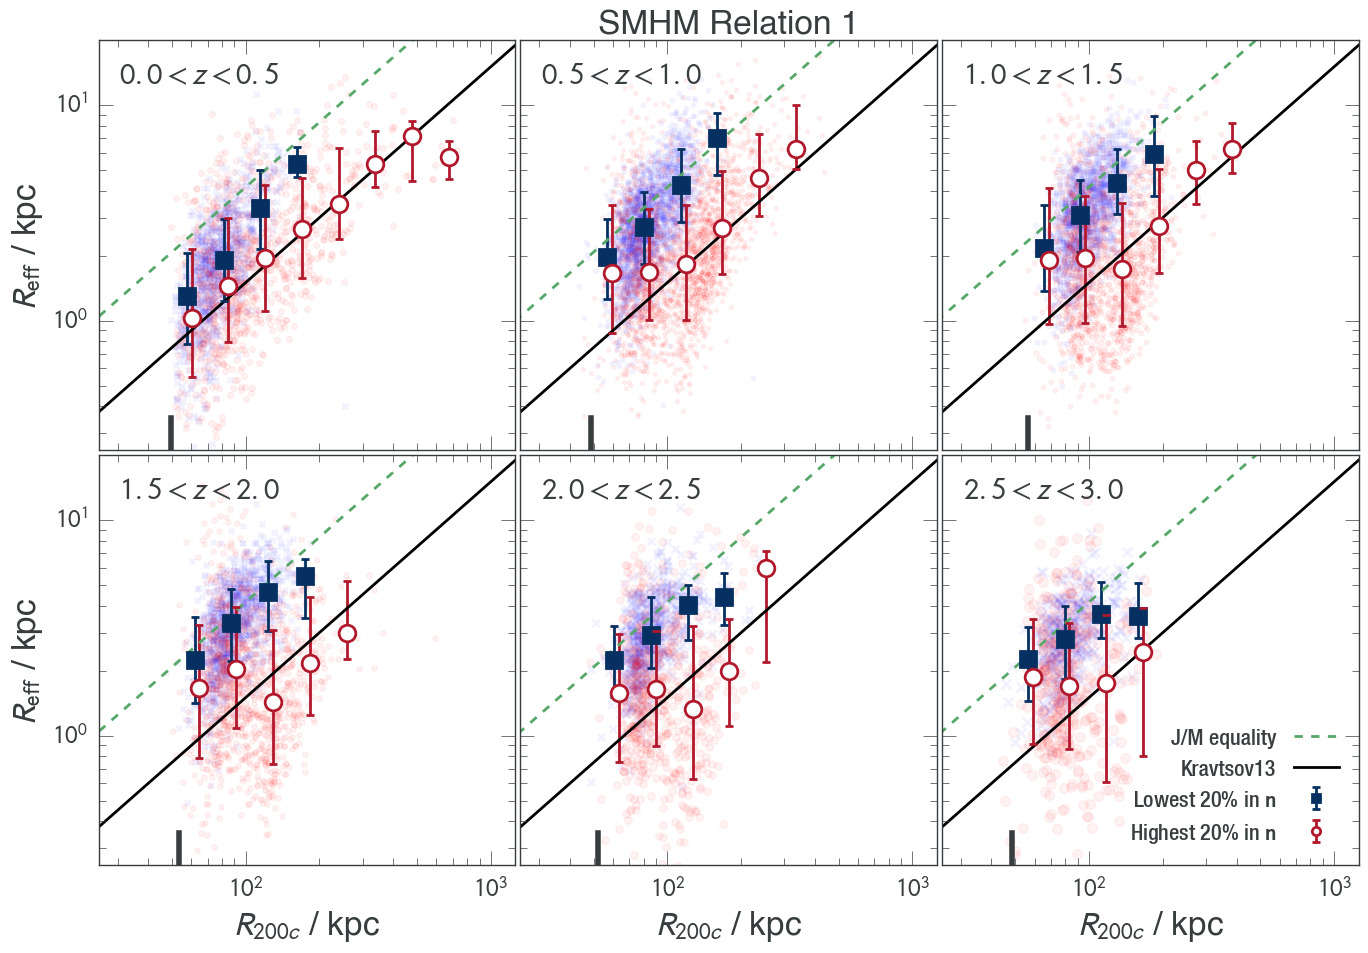

In [5]:
reload(prr)
grid = prr.plot_rr_allz(df, cut_by='sersic', include='n_20pc', conversion='t14', alpha_scatter=0.05, add_vdw14_fit=False,
                        filename='', legend_fontsize=16)

#### Try LOWESS (as suggested by the editor)

Median redshift for 0.0 < z < 0.5 is 0.35
('n_20pc = ', 1072)
n_low, n_high = 0.82, 1.84
n_blue, n_red = 1072, 1071
alpha_blue, alpha_red = 0.10, 0.10
Median redshift for 0.5 < z < 1.0 is 0.73
('n_20pc = ', 2451)
n_low, n_high = 0.77, 2.07
n_blue, n_red = 2451, 2450
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 1.0 < z < 1.5 is 1.23
('n_20pc = ', 1635)
n_low, n_high = 0.68, 2.14
n_blue, n_red = 1635, 1634
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 1.5 < z < 2.0 is 1.70
('n_20pc = ', 1293)
n_low, n_high = 0.69, 2.37
n_blue, n_red = 1293, 1292
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 2.0 < z < 2.5 is 2.23
('n_20pc = ', 671)
n_low, n_high = 0.68, 2.42
n_blue, n_red = 671, 670
alpha_blue, alpha_red = 0.15, 0.15
Median redshift for 2.5 < z < 3.0 is 2.69
('n_20pc = ', 407)
n_low, n_high = 0.69, 2.45
n_blue, n_red = 407, 406
alpha_blue, alpha_red = 0.30, 0.30


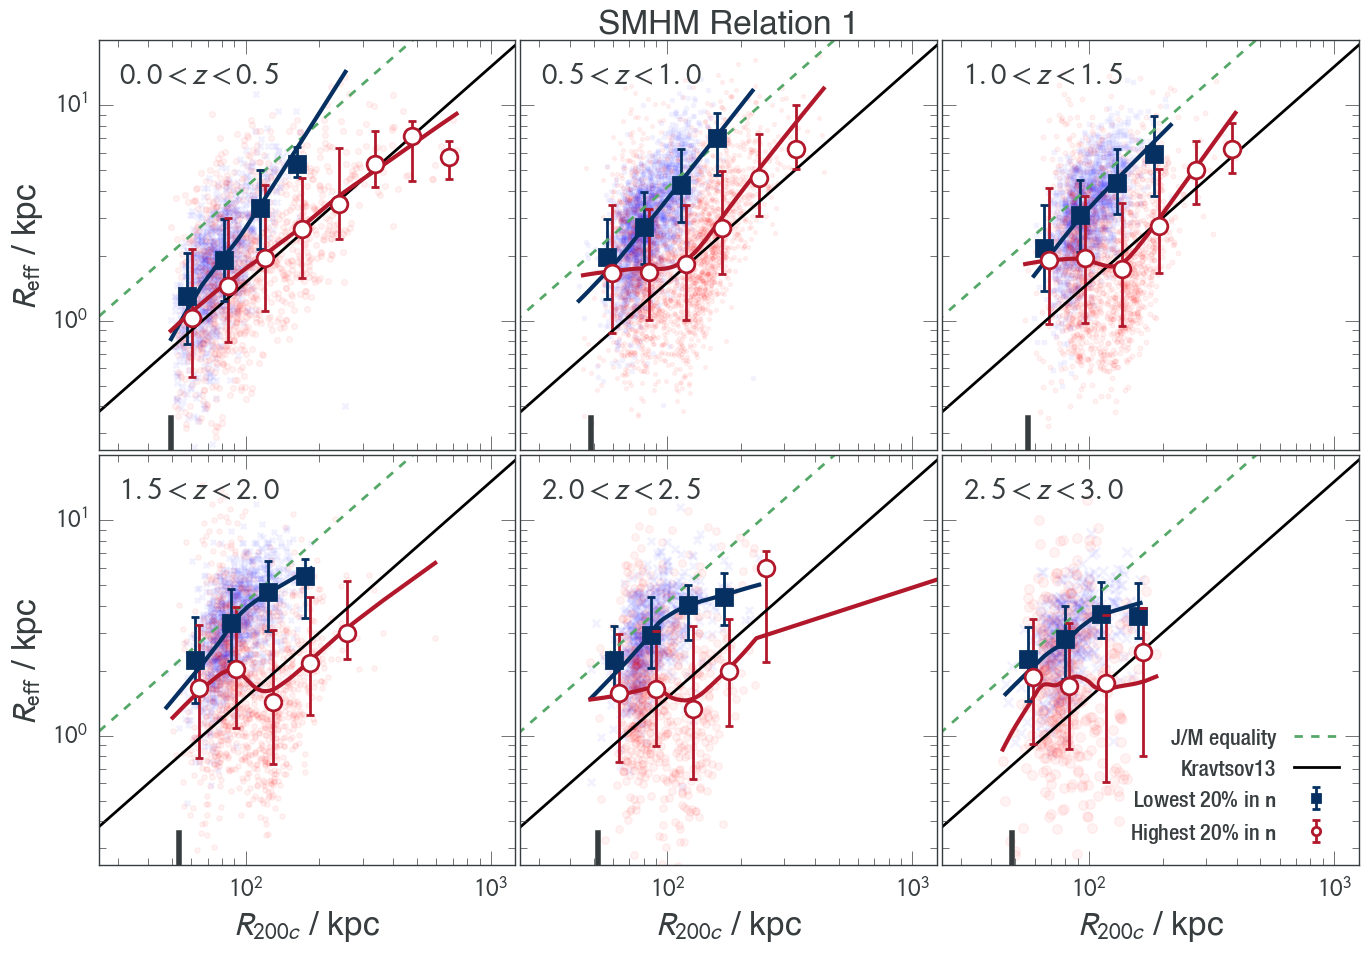

In [6]:
reload(prr)
grid = prr.plot_rr_allz(df, cut_by='sersic', include='n_20pc', conversion='t14', alpha_scatter=0.05,
                        lowess=True, filename='',
                       legend_fontsize=16)

#### Split galaxies by sSFR

Median redshift for 0.0 < z < 0.5 is 0.35
('n_20pc = ', 1072)
n_blue, n_red = 1071, 1072
alpha_blue, alpha_red = 0.10, 0.10
Median redshift for 0.5 < z < 1.0 is 0.73
('n_20pc = ', 2451)
n_blue, n_red = 2450, 2451
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 1.0 < z < 1.5 is 1.23
('n_20pc = ', 1635)
n_blue, n_red = 1634, 1635
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 1.5 < z < 2.0 is 1.70
('n_20pc = ', 1293)
n_blue, n_red = 1292, 1293
alpha_blue, alpha_red = 0.05, 0.05
Median redshift for 2.0 < z < 2.5 is 2.23
('n_20pc = ', 671)
n_blue, n_red = 670, 671
alpha_blue, alpha_red = 0.15, 0.15
Median redshift for 2.5 < z < 3.0 is 2.69
('n_20pc = ', 407)
n_blue, n_red = 406, 407
alpha_blue, alpha_red = 0.30, 0.30


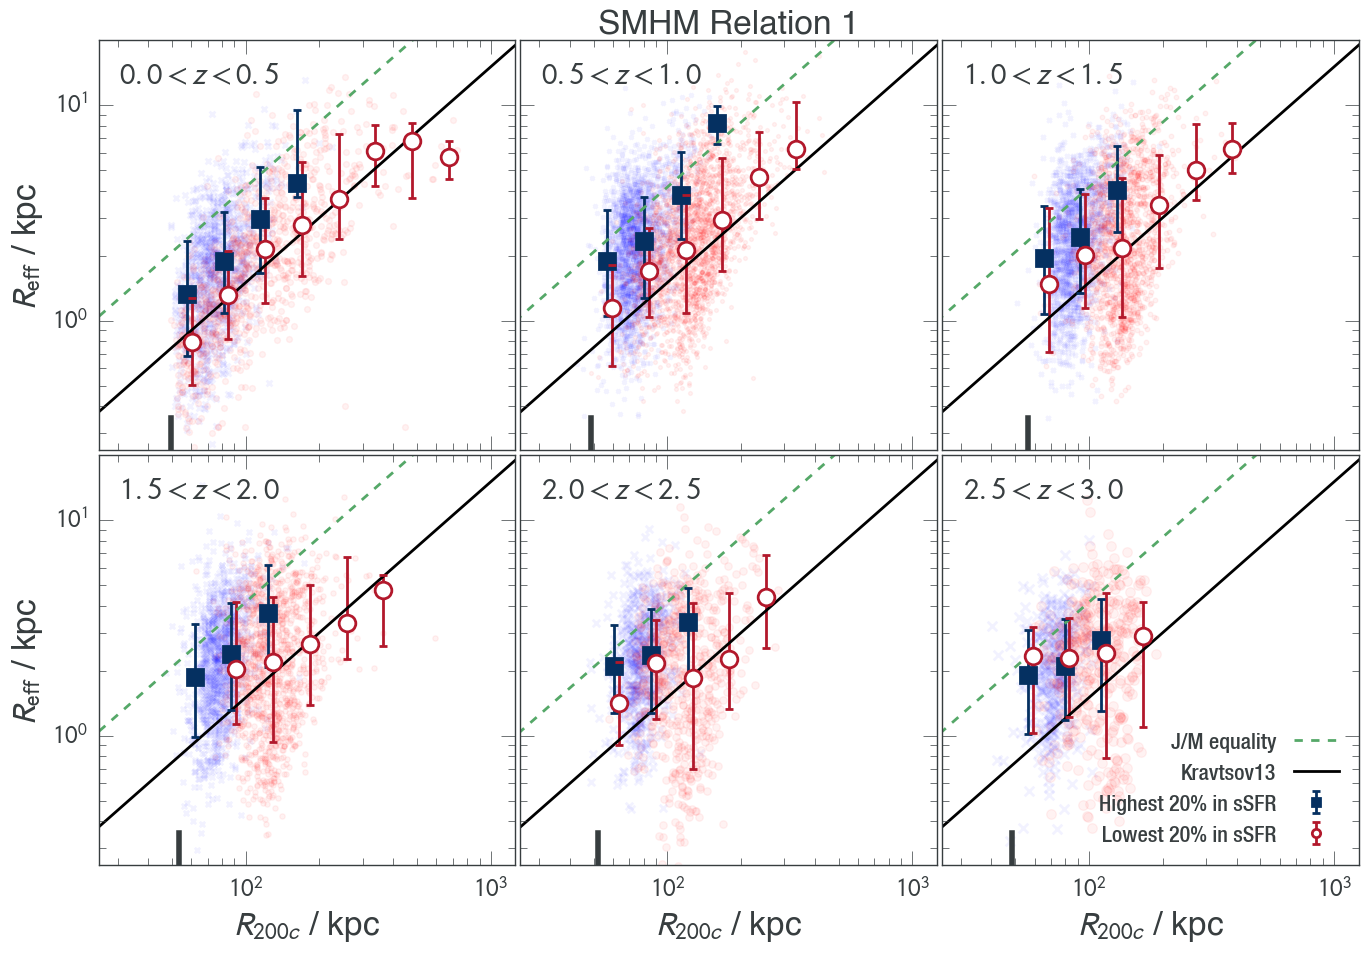

In [7]:
reload(prr)
grid = prr.plot_rr_allz(df, cut_by='ssfr', include='n_20pc', conversion='t14',
                        alpha_scatter=0.05, filename='',
                       legend_fontsize=16)

### Include all galaxies

Median redshift for 0.0 < z < 0.5 is 0.35
Median redshift for 0.5 < z < 1.0 is 0.73
Median redshift for 1.0 < z < 1.5 is 1.23
Median redshift for 1.5 < z < 2.0 is 1.70
Median redshift for 2.0 < z < 2.5 is 2.23
Median redshift for 2.5 < z < 3.0 is 2.69


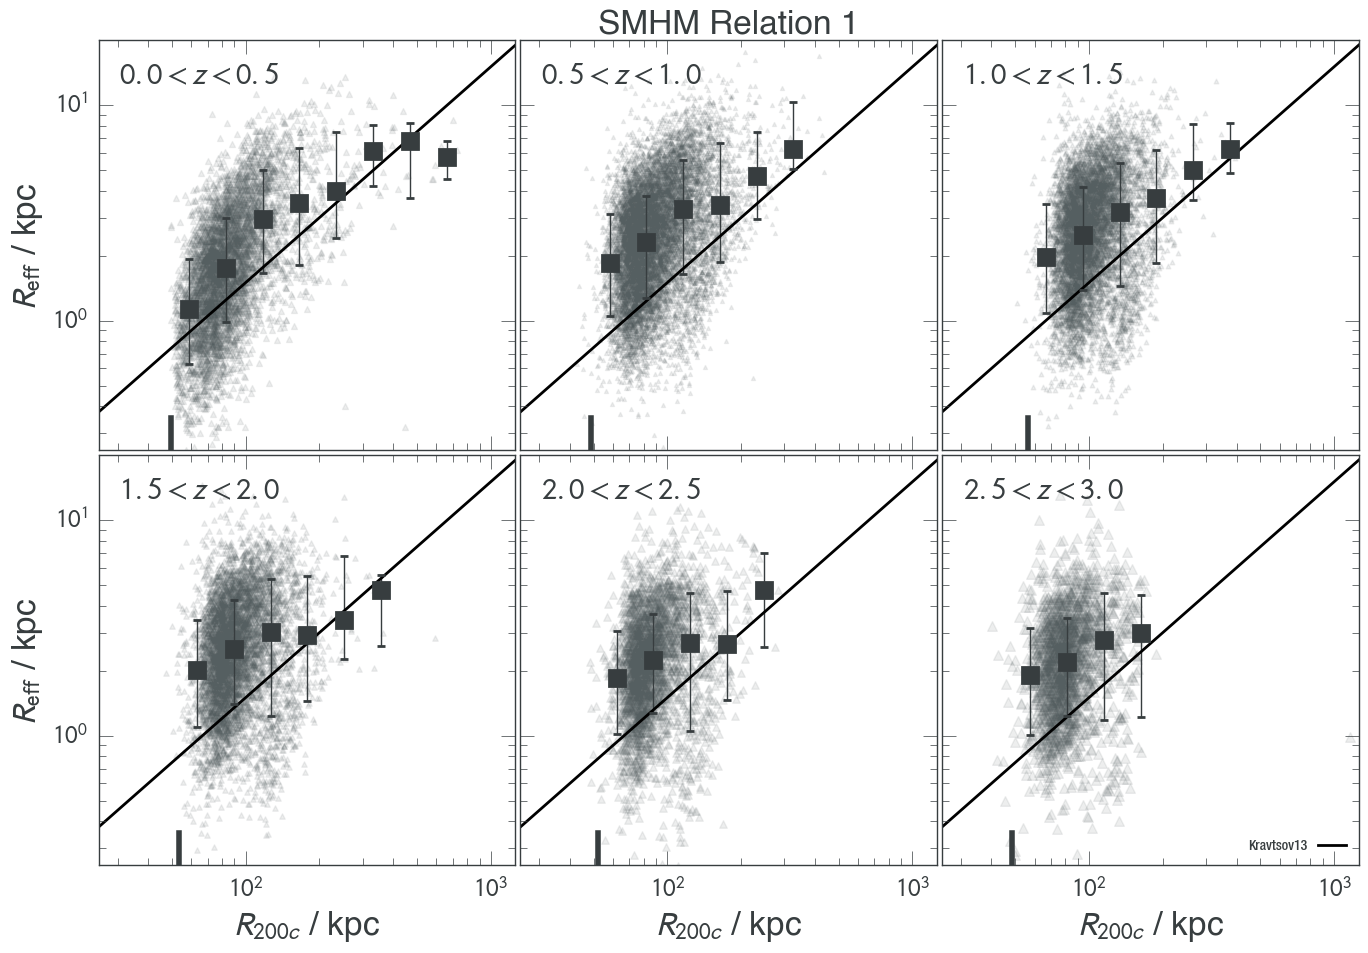

In [8]:
grid3 = prr.plot_rr_allz(df, cut_by='none', include='all', conversion='t14')

### Now plot the comparison between different SMHM relations at 0 < z < 0.5

Median alpha for all galaxies in 0.0<z<0.5 is 0.0213
Median alpha for all galaxies in 0.0<z<0.5 is 0.0252
Median alpha for all galaxies in 0.0<z<0.5 is 0.0226
Median alpha for all galaxies in 0.0<z<0.5 is 0.0239


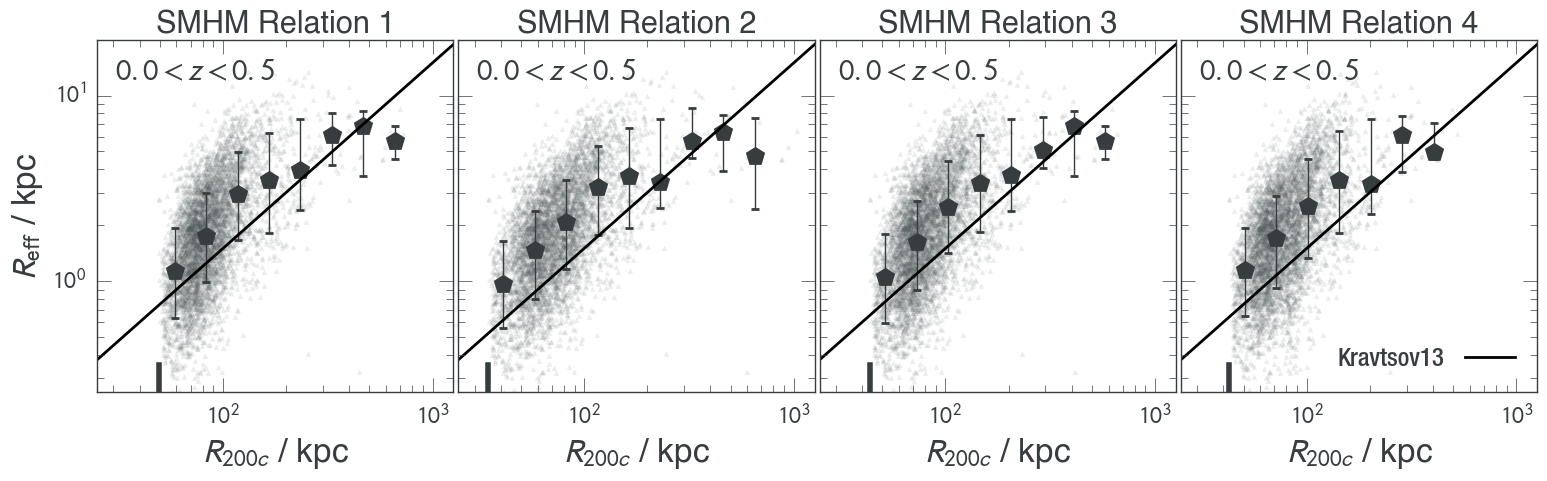

In [9]:
# No splitting subsamples
reload(prr)
grid = prr.plot_rr_allmethods(df, cut_by='none', include='all', add_vdw14=False, filename='',
                             alpha_scatter=0.07, legend_fontsize=18)
# xticks_major = FixedLocator([2., 3.])
# xticks_minor = FixedLocator(np.concatenate([np.log10(np.arange(20., 99., 10.)),
#                                 np.log10(np.arange(200., 999., 100.))]))
# grid[0].xaxis.set_major_locator(xticks_major)
# grid[0].xaxis.set_minor_locator(xticks_minor)
# grid[0].tick_params(which='major', length=10, width=1)
# grid[0].tick_params(which='minor', length=5, width=1)

## Split 0 < z < 0.5 galaxies by Sersic index

('n_20pc = ', 1072)
For SMHM relation T14:
median(alpha) = -1.6209 for late-types
median(alpha) = -1.7760 for early-types
('n_20pc = ', 1072)
For SMHM relation B13:
median(alpha) = -1.5414 for late-types
median(alpha) = -1.7255 for early-types
('n_20pc = ', 1072)
For SMHM relation K13:
median(alpha) = -1.5928 for late-types
median(alpha) = -1.7504 for early-types
('n_20pc = ', 1072)
For SMHM relation R15:
median(alpha) = -1.5657 for late-types
median(alpha) = -1.7563 for early-types


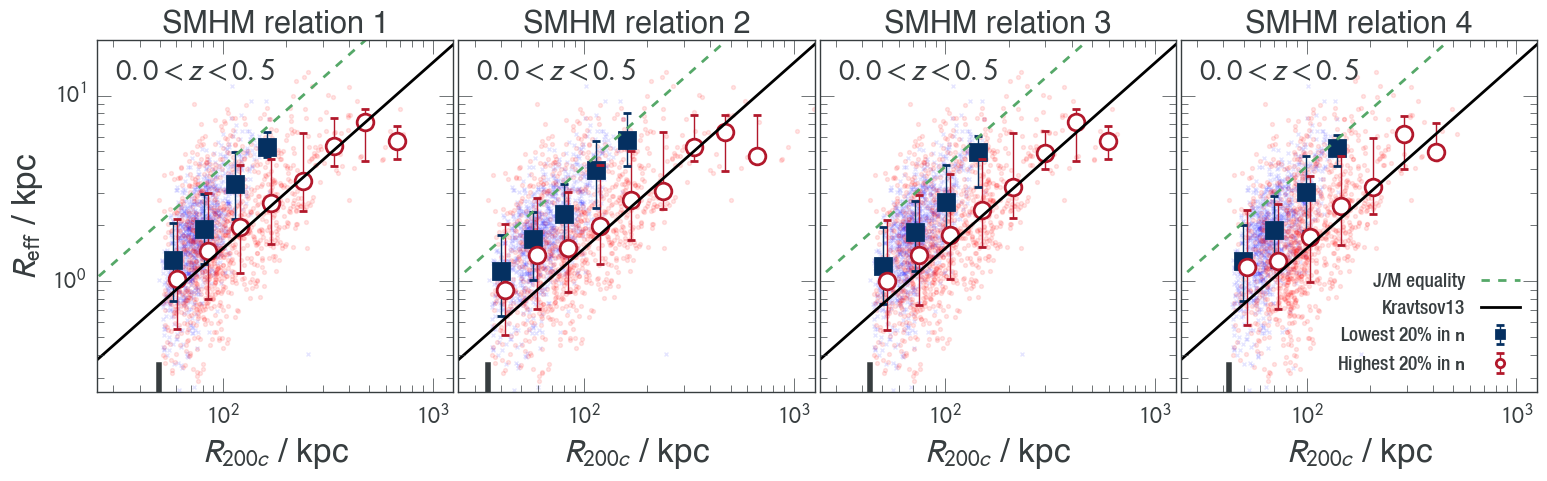

In [10]:
# Select 20% tails in the Sersic index distribution
reload(prr)
grid = prr.plot_rr_allmethods(df, cut_by='sersic', include='n_20pc', filename='',
                              alpha_scatter=0.1, legend_fontsize=14)

#### Split galaxies by sSFR

('n_20pc = ', 1072)
For SMHM relation T14:
median(alpha) = -1.6284 for late-types
median(alpha) = -1.7932 for early-types
('n_20pc = ', 1072)
For SMHM relation B13:
median(alpha) = -1.5500 for late-types
median(alpha) = -1.7332 for early-types
('n_20pc = ', 1072)
For SMHM relation K13:
median(alpha) = -1.6003 for late-types
median(alpha) = -1.7641 for early-types
('n_20pc = ', 1072)
For SMHM relation R15:
median(alpha) = -1.5860 for late-types
median(alpha) = -1.7443 for early-types


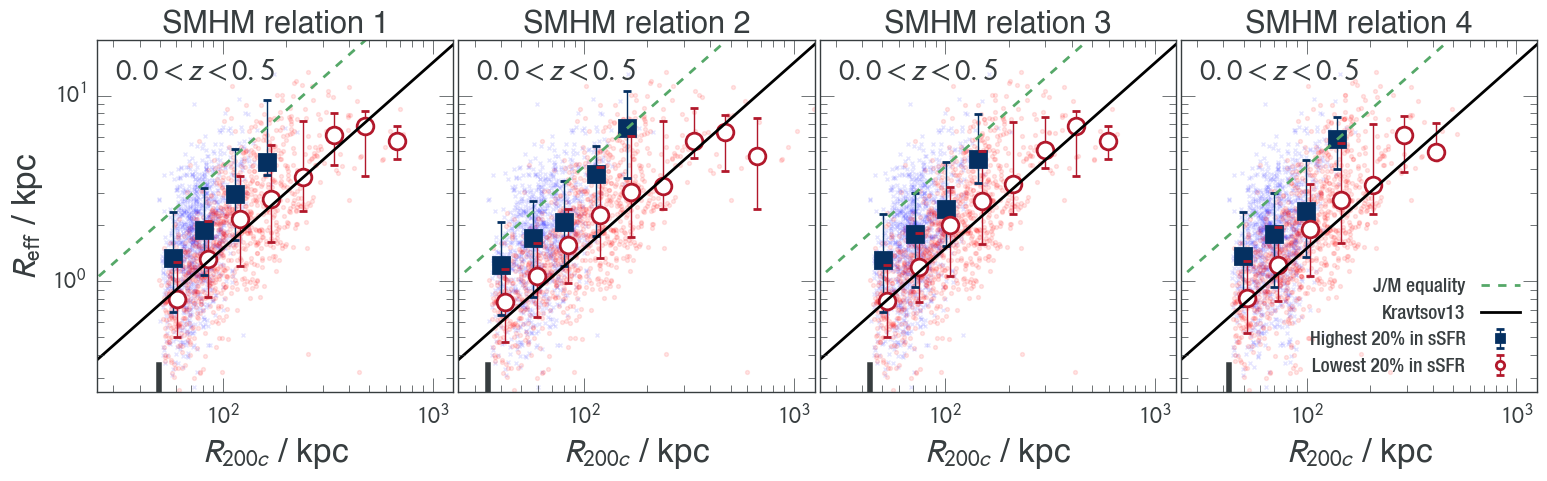

In [11]:
# Select 20% tails in the sSFR index distribution
reload(prr)
grid = prr.plot_rr_allmethods(df, cut_by='ssfr', include='n_20pc', filename='',
                              alpha_scatter=0.1, legend_fontsize=14)

### Compare CANDELS stellar mass with vdw14 stellar mass (from 3D-HST)

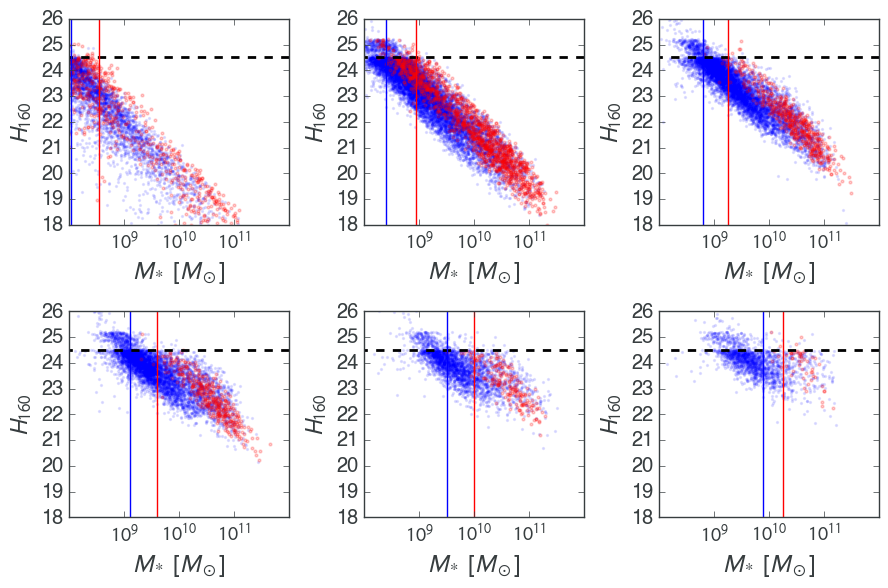

In [12]:
plt.figure(figsize=(9, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    z0 = 0.5 * i
    z1 = z0 + 0.5
    df_bin = df[(df['zbest'] >= z0) & (df['zbest'] < z1)]
    red = uvj.select_uvj_red(df_bin, (z0 + z1) / 2.)
    plt.scatter(df_bin['m_med'][~red], df_bin['hmag'][~red], c='blue', edgecolors='blue', s=2, alpha=0.1)
    plt.scatter(df_bin['m_med'][red], df_bin['hmag'][red], c='red', edgecolors='red', s=4, alpha=0.2)
    plt.xlabel(r'$M_*$ [$M_\odot$]')
    plt.ylabel(r'$H_{160}$')
    plt.xticks([9, 10, 11], [r'$10^9$', r'$10^{10}$', r'$10^{11}$'])
    plt.plot([7, 12], [24.5, 24.5], ls='--', lw=2, c='black')
    plt.plot([prr.logM_lim_blue[i]] * 2, [18., 26.], c='blue')
    plt.plot([prr.logM_lim_red[i]] * 2, [18, 26], c='red')
    plt.xlim(8., 12)
    plt.ylim(18, 26)
plt.tight_layout()

### Investigate the Sersic index & sSFR distributions for the 10% tails

#### First, Sersic index

/Users/khuang/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


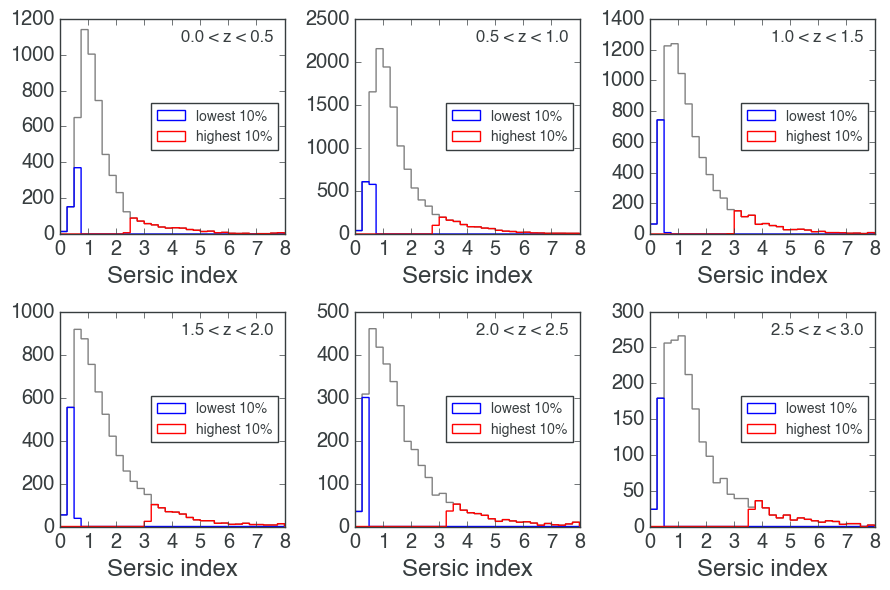

In [13]:
fig = plt.figure(figsize=(9, 6))
z0 = np.arange(0., 3., 0.5)
# Sersic index
for i in range(len(z0)):
    ax = plt.subplot(2, 3, i+1)
    dfz = df[(df['zbest'] >= z0[i]) & (df['zbest'] < (z0[i]+0.5))]
    dfz = dfz.sort('sersic_n', ascending=True)
    n_10pc = len(dfz) / 10
    h0 = plt.hist(dfz['sersic_n'].values, bins=np.arange(0., 8.25, 0.25), histtype='step',
                 color='gray')
    h1 = plt.hist(dfz['sersic_n'].iloc[:n_10pc].values, bins=np.arange(0., 8.25, 0.25), histtype='step',
                 color='blue', label='lowest 10%')
    h2 = plt.hist(dfz['sersic_n'].iloc[-n_10pc:].values, bins=np.arange(0., 8.25, 0.25), histtype='step',
                 color='red', label='highest 10%')
    plt.xlabel('Sersic index')
    ax.text(0.95, 0.95, '{:.1f} < z < {:.1f}'.format(z0[i], z0[i]+0.5), transform=ax.transAxes,
           ha='right', va='top', size='large')
    ax.legend(loc='center right', fontsize='medium')
plt.tight_layout()
fig.savefig('ndist_10pc_tails.png')
# plt.suptitle('10% tails of Sersic index distribution', fontsize='x-large')

#### Now sSFR

/Users/khuang/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


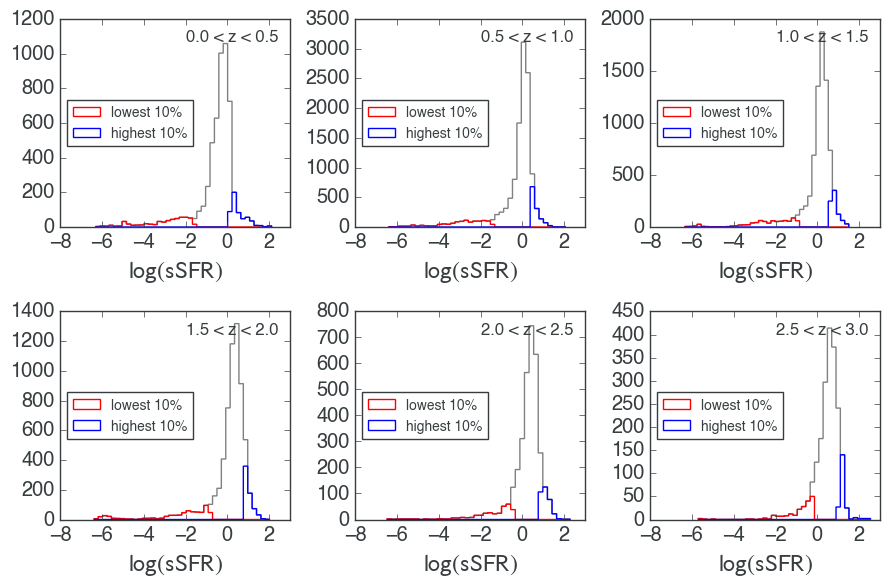

In [14]:
fig = plt.figure(figsize=(9, 6))
z0 = np.arange(0., 3., 0.5)
for i in range(len(z0)):
    ax = plt.subplot(2, 3, i+1)
    dfz = df[(df['zbest'] >= z0[i]) & (df['zbest'] < (z0[i]+0.5))]
    dfz = dfz.sort('logssfr_med', ascending=True)
    n_10pc = len(dfz) / 10
    h0 = plt.hist(dfz['logssfr_med'].values, bins=40, histtype='step',
                 color='gray')
    h1 = plt.hist(dfz['logssfr_med'].iloc[:n_10pc].values, bins=h0[1], histtype='step',
                 color='red', label='lowest 10%')
    h2 = plt.hist(dfz['logssfr_med'].iloc[-n_10pc:].values, bins=h0[1], histtype='step',
                 color='blue', label='highest 10%')
    plt.xlabel(r'$\log(\rm{sSFR})$')
    ax.text(0.95, 0.95, '{:.1f} < z < {:.1f}'.format(z0[i], z0[i]+0.5), transform=ax.transAxes,
           ha='right', va='top', size='large')
    ax.legend(loc='center left', fontsize='medium')
    ax.set_xlim(-8, 3)
plt.tight_layout()
fig.savefig('ssfrdist_10pc_tails.png')

#### Now see where UVJ-selected galaxies are

/Users/khuang/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Fraction of UVJ red galaxies at 0.0 < z < 0.5 is 0.155
Fraction of UVJ red galaxies at 0.5 < z < 1.0 is 0.121
Fraction of UVJ red galaxies at 1.0 < z < 1.5 is 0.064
Fraction of UVJ red galaxies at 1.5 < z < 2.0 is 0.059
Fraction of UVJ red galaxies at 2.0 < z < 2.5 is 0.055
Fraction of UVJ red galaxies at 2.5 < z < 3.0 is 0.027


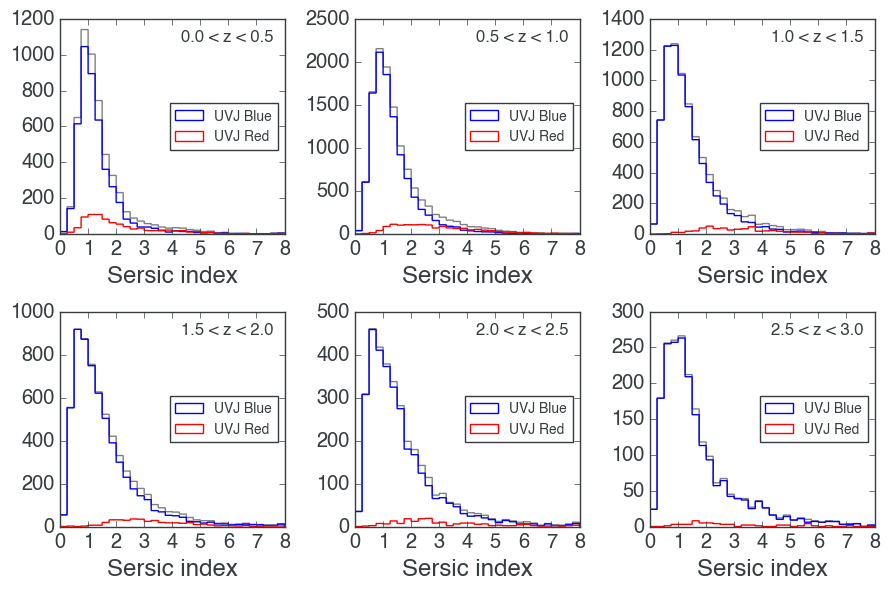

In [15]:
fig = plt.figure(figsize=(9, 6))
z0 = np.arange(0., 3., 0.5)
# Sersic index
for i in range(len(z0)):
    ax = plt.subplot(2, 3, i+1)
    dfz = df[(df['zbest'] >= z0[i]) & (df['zbest'] < (z0[i]+0.5))]
    dfz = dfz.sort('sersic_n', ascending=True)
    red = uvj.select_uvj_red(dfz, z0[i]+0.25)
    print("Fraction of UVJ red galaxies at {:.1f} < z < {:.1f} is {:.3f}".format(z0[i], z0[i]+0.5, float(np.sum(red))/len(dfz)))
    h0 = plt.hist(dfz['sersic_n'].values, bins=np.arange(0., 8.25, 0.25), histtype='step',
                 color='gray')
    h1 = plt.hist(dfz['sersic_n'].values[~red], bins=np.arange(0., 8.25, 0.25), histtype='step',
                 color='blue', label='UVJ Blue')
    h2 = plt.hist(dfz['sersic_n'].values[red], bins=np.arange(0., 8.25, 0.25), histtype='step',
                 color='red', label='UVJ Red')
    plt.xlabel('Sersic index')
    ax.text(0.95, 0.95, '{:.1f} < z < {:.1f}'.format(z0[i], z0[i]+0.5), transform=ax.transAxes,
           ha='right', va='top', size='large')
    ax.legend(loc='center right', fontsize='medium')
plt.tight_layout()
fig.savefig('ndist_uvj.png')

/Users/khuang/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


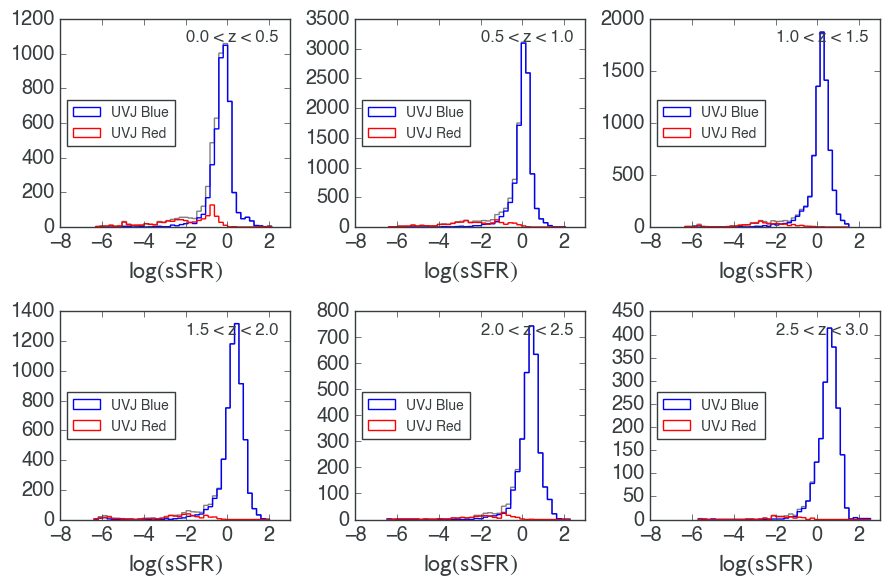

In [16]:
fig = plt.figure(figsize=(9, 6))
z0 = np.arange(0., 3., 0.5)
for i in range(len(z0)):
    ax = plt.subplot(2, 3, i+1)
    dfz = df[(df['zbest'] >= z0[i]) & (df['zbest'] < (z0[i]+0.5))]
    dfz = dfz.sort('logssfr_med', ascending=True)
    red = uvj.select_uvj_red(dfz, z0[i] + 0.25)
    h0 = plt.hist(dfz['logssfr_med'].values, bins=40, histtype='step',
                 color='gray')
    h1 = plt.hist(dfz['logssfr_med'].values[~red], bins=h0[1], histtype='step',
                 color='blue', label='UVJ Blue')
    h2 = plt.hist(dfz['logssfr_med'].values[red], bins=h0[1], histtype='step',
                 color='red', label='UVJ Red')
    plt.xlabel(r'$\log(\rm{sSFR})$')
    ax.text(0.95, 0.95, '{:.1f} < z < {:.1f}'.format(z0[i], z0[i]+0.5), transform=ax.transAxes,
           ha='right', va='top', size='large')
    ax.legend(loc='center left', fontsize='medium')
    ax.set_xlim(-8, 3)
plt.tight_layout()
fig.savefig('ssfrdist_uvj.png')

### Plot my UVJ selection

/Users/khuang/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


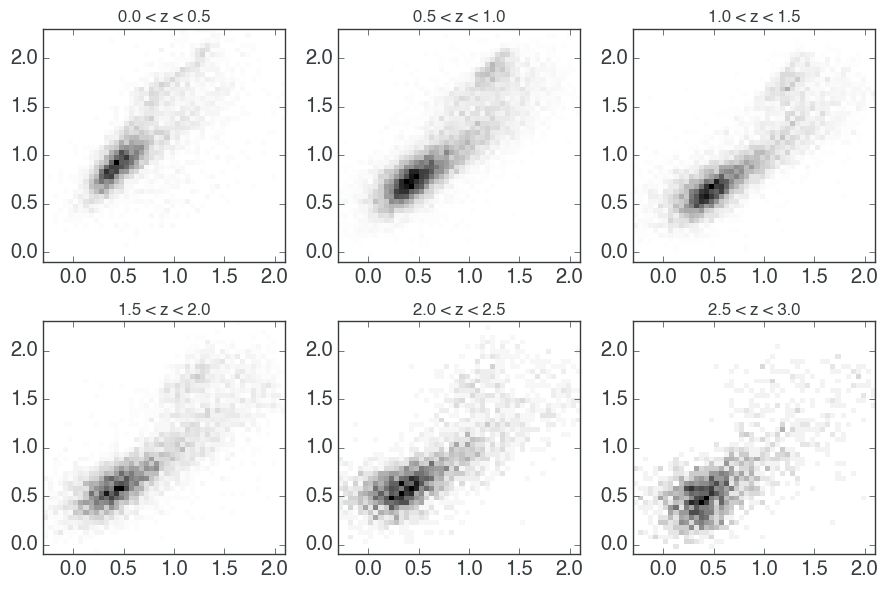

In [17]:
fig = plt.figure(figsize=(9, 6))
z0 = np.arange(0., 3., 0.5)
for i in range(len(z0)):
    ax = plt.subplot(2, 3, i+1)
    dfz = df[(df['zbest'] >= z0[i]) & (df['zbest'] < (z0[i]+0.5))]
    dfz = dfz.sort('logssfr_med', ascending=True)
    red = uvj.select_uvj_red(dfz, z0[i] + 0.25)
    umv = (dfz['restujohnson'] - dfz['restvjohnson']).values
    vmj = (dfz['restvjohnson'] - dfz['restj2mass']).values
    xbins = np.arange(-0.3, 2.101, 0.05)
    ybins = np.arange(-0.1, 2.301, 0.05)
    h2 = ax.hist2d(vmj, umv, [xbins, ybins], cmap='gray_r')
    ax.set_title('{:.1f} < z < {:.1f}'.format(z0[i], z0[i]+0.5), size='large')
    ax.set_xlim(-0.3, 2.1)
    ax.set_ylim(-0.1, 2.3)
plt.tight_layout()

## Look at the distribution of our stellar masses relative to the depths <br> of SMF from Tomczak+2014

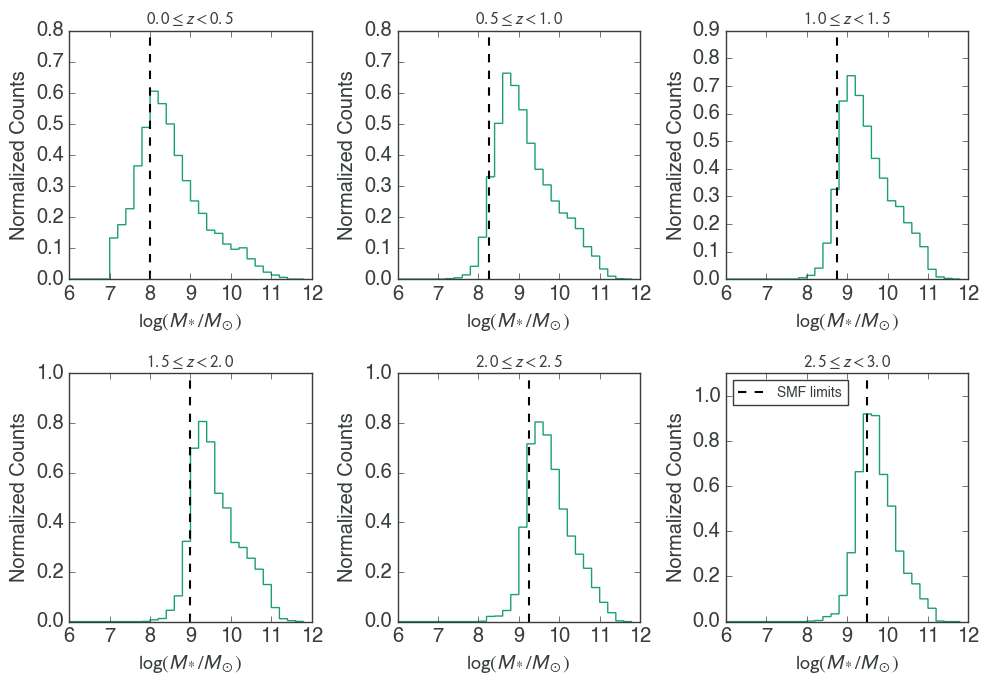

In [18]:
fig3 = plt.figure(figsize=(10, 7))
z0 = np.arange(0., 3., 0.5)
logm_bins = np.arange(6., 12., 0.2)
logm_min = [8., 8.25, 8.75, 9., 9.25, 9.5]
for i in range(len(z0)):
    ax = plt.subplot(2, 3, i+1)
    dfz = df[(df['zbest'] >= z0[i]) & (df['zbest'] < (z0[i]+0.5))]
    hmass = ax.hist(dfz['m_med'].values, bins=logm_bins, histtype='step', normed=True)
    ax.set_xlabel(r'$\log(M_*/M_\odot)$', size='x-large')
    ax.set_ylabel('Normalized Counts', size='x-large')
#     ax.text(0.95, 0.95, r'${:.1f} \leq z < {:.1f}$'.format(z0[i], z0[i]+0.5),
#            transform=ax.transAxes, ha='right', va='top', size='large',
#            backgroundcolor='white')
    ax.set_title(r'${:.1f} \leq z < {:.1f}$'.format(z0[i], z0[i]+0.5), size='large')
    ymax = ax.get_ylim()[1]
    ax.plot([logm_min[i]] * 2, [0, ymax+0.1], ls='--', c='black', lw=1.5,
           label='SMF limits')
    ax.set_ylim(ymax=ymax+0.1)
    if i == 5:
        ax.legend(loc=2, fontsize='medium')
plt.tight_layout()
fig3.savefig('smass_smf_limits_t14.png')

### How many UVJ red/blue galaxies are there above 1e11 M_solar at 0 < z < 0.5?

In [19]:
df0 = df[df.zbest < 0.5]
red = uvj.select_uvj_red(df0, 0.25)
blue = np.logical_not(red)
n_massive_red = np.sum(df0.m_med[red] >= 11)
n_massive_blue = np.sum(df0.m_med[blue] >= 11)
print("{} red galaxies have M_* > 1e11 M_solar at 0 < z < 0.5".format(n_massive_red))
print("{} blue galaxies have M_* > 1e11 M_solar at 0 < z < 0.5".format(n_massive_blue))
early = (df0.sersic_n >= np.percentile(df0.sersic_n, 80))
late = (df0.sersic_n <= np.percentile(df0.sersic_n, 20))
n_massive_early = np.sum(df0.m_med[early] >= 11)
n_massive_late = np.sum(df0.m_med[late] >= 11)
print("{} high-n galaxies have M_* > 1e11 M_solar at 0 < z < 0.5".format(n_massive_early))
print("{} low-n galaxies have M_* > 1e11 M_solar at 0 < z < 0.5".format(n_massive_late))

17 red galaxies have M_* > 1e11 M_solar at 0 < z < 0.5
3 blue galaxies have M_* > 1e11 M_solar at 0 < z < 0.5
19 high-n galaxies have M_* > 1e11 M_solar at 0 < z < 0.5
0 low-n galaxies have M_* > 1e11 M_solar at 0 < z < 0.5


### How many UVJ red/blue galaxies are there above 1e11 M_solar at 0 < z < 0.5?

In [20]:
df1 = df[(df.zbest < 1.0) & (df.zbest >= 0.5)]
red = uvj.select_uvj_red(df1, 0.75)
blue = np.logical_not(red)
n_massive_red = np.sum(df1.m_med[red] >= 11.)
n_massive_blue = np.sum(df1.m_med[blue] >= 11.)
print("{} red galaxies have M_* > 1e11 M_solar at 0.5 < z < 1".format(n_massive_red))
print("{} blue galaxies have M_* > 1e11 M_solar at 0.5 < z < 1".format(n_massive_blue))
early = (df1.sersic_n >= np.percentile(df1.sersic_n, 80))
late = (df1.sersic_n <= np.percentile(df1.sersic_n, 20))
n_massive_early = np.sum(df1.m_med[early] >= 11.)
n_massive_late = np.sum(df1.m_med[late] >= 11.)
print("{} high-n galaxies have M_* > 1e11 M_solar at 0 < z < 0.5".format(n_massive_early))
print("{} low-n galaxies have M_* > 1e11 M_solar at 0 < z < 0.5".format(n_massive_late))

77 red galaxies have M_* > 1e11 M_solar at 0.5 < z < 1
30 blue galaxies have M_* > 1e11 M_solar at 0.5 < z < 1
104 high-n galaxies have M_* > 1e11 M_solar at 0 < z < 0.5
0 low-n galaxies have M_* > 1e11 M_solar at 0 < z < 0.5


### Plot Re/R200c for my sample

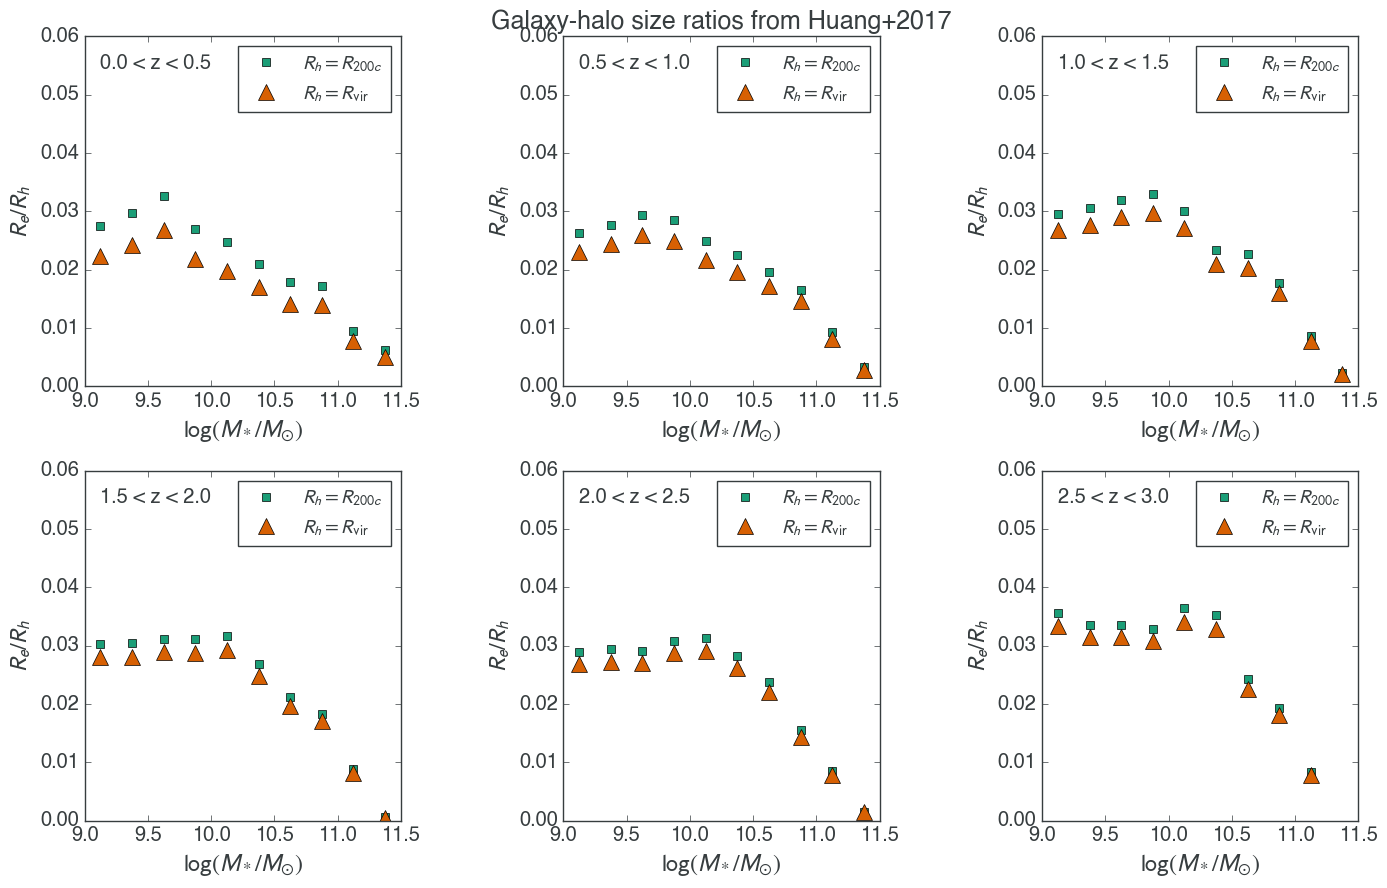

In [21]:
fig = plt.figure(figsize=(14, 9))
z0 = np.array([0., 0.5, 1., 1.5, 2., 2.5])
massbins = np.arange(9., 11.6, 0.25)
for i in range(len(z0)):
    zcrit = (df.zbest >= z0[i]) & (df.zbest < (z0[i]+0.5))
    dfz = df[zcrit]
    ax = fig.add_subplot(2, 3, i+1)
    srhr200c = dfz['r_eff_vrest_kpc'] / dfz['r200c_m200c_kpc_b13']
    srhr200c_med = binned_statistic(dfz['m_med'].values, srhr200c, statistic=np.median, bins=massbins)
    srhrvir = dfz['r_eff_vrest_kpc'] / dfz['rvir_mvir_kpc_b13']
    srhrvir_med = binned_statistic(dfz['m_med'].values, srhrvir, statistic=np.median, bins=massbins)
    ax.plot(massbins[:-1]+0.125, srhr200c_med[0], ls='none', marker='s', label=r'$R_h=R_{200c}$')
    ax.plot(massbins[:-1]+0.125, srhrvir_med[0], ls='none', marker='^', ms=12, label=r'$R_h=R_{\rm{vir}}$')
    ax.set_xlabel(r'$\log(M_* / M_{\odot})$')
    ax.set_ylabel(r'$R_e / R_h$')
    ax.text(0.05, 0.95, r'{:.1f} < z < {:.1f}'.format(z0[i], z0[i]+0.5),
           transform=ax.transAxes, ha='left', va='top', size='x-large')
    ax.legend(loc=0)
    ax.set_ylim(0., 0.06)
    if i == 1:
        ax.set_title('Galaxy-halo size ratios from Huang+2017', size=18)
plt.tight_layout()
fig.savefig('Reff_Rhalo_mstellar.png')

### Plot stellar mass vs. halo mass just to be sure

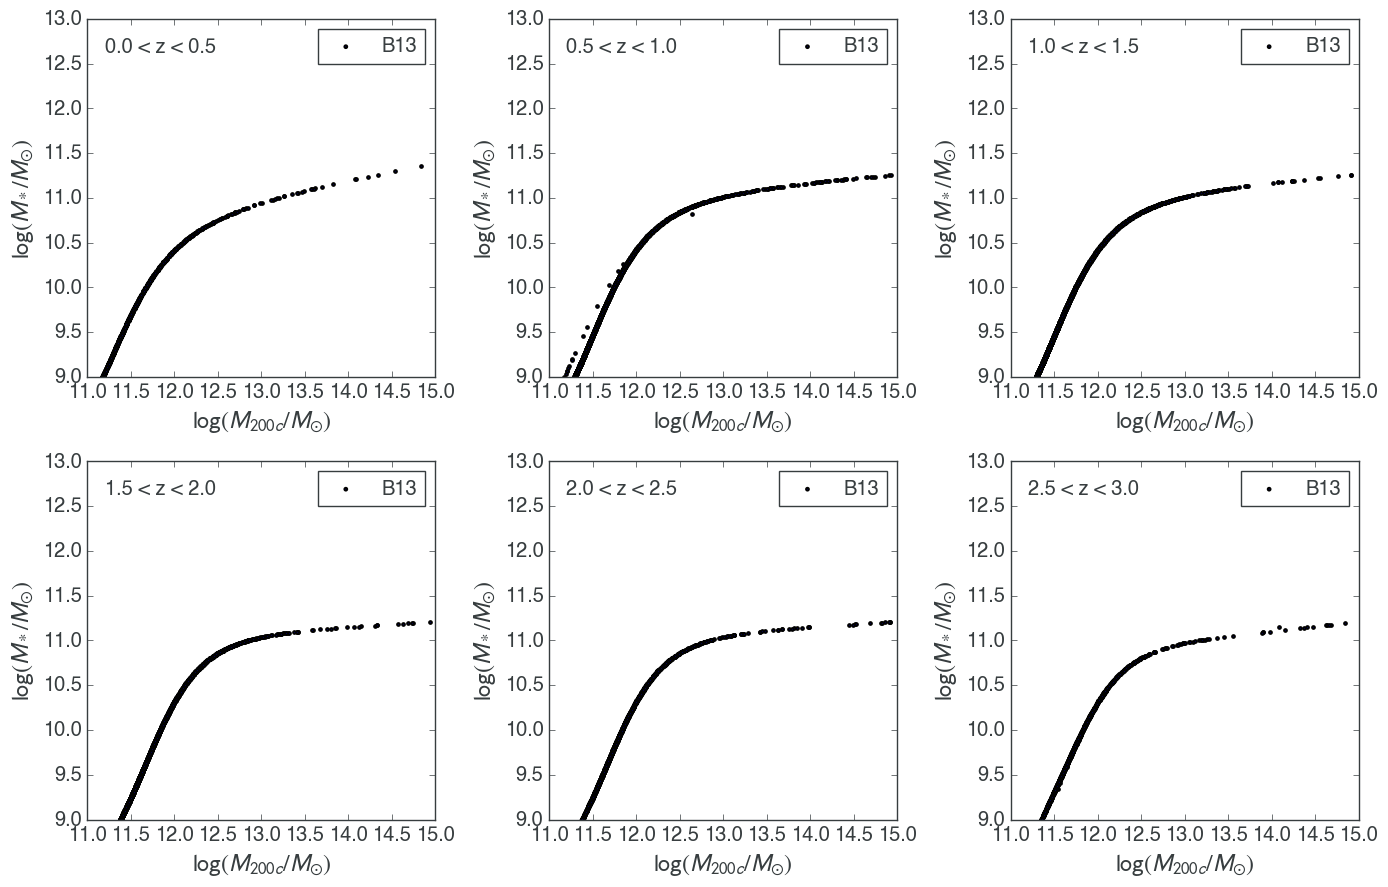

In [22]:
fig = plt.figure(figsize=(14, 9))
z0 = np.array([0., 0.5, 1., 1.5, 2., 2.5])
massbins = np.arange(9., 11.6, 0.25)
for i in range(len(z0)):
    zcrit = (df.zbest >= z0[i]) & (df.zbest < (z0[i]+0.5))
    dfz = df[zcrit]
    ax = fig.add_subplot(2, 3, i+1)
    ax.scatter(dfz['mvir_b13'], dfz['m_med'], s=2, lw=2, label='B13')
#     ax.scatter(dfz['m200c_r15'], dfz['m_med'], ls='--', lw=2, label='R15')
    ax.set_xlabel(r'$\log(M_{200c} / M_{\odot})$')
    ax.set_ylabel(r'$\log(M_* / M_{\odot})$')
    ax.text(0.05, 0.95, r'{:.1f} < z < {:.1f}'.format(z0[i], z0[i]+0.5),
           transform=ax.transAxes, ha='left', va='top', size='x-large')
    ax.legend(loc=0)
    ax.set_ylim(9., 13)
    ax.set_xlim(11, 15)
#     if i == 1:
#         ax.set_title('Galaxy-halo size ratios from Huang+2017', size=18)
plt.tight_layout()